In [1]:
# importing packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [2]:
# importing data
low_data = pd.read_csv('data/calib_data/Sheet 1-Lower voltage counts with upper voltage 1950.csv')
up_data = pd.read_csv('data/calib_data/Sheet 1-Upper voltage counts with lower voltage = 2100V.csv')

In [3]:
low_data

,Lower voltage [V],counts 1,counts 2,counts 3,count 4,count average,current [mcroA]
0,1700,126,142,139,120,131.75,1178
1,1750,332,336,321,339,332.00,1250
2,1800,644,649,600,617,627.50,1288
3,1850,1181,1157,1148,1146,1158.00,1342
4,1900,1851,2052,1878,2002,1945.75,1396
5,1950,3564,3470,3435,3342,3452.75,1449
6,2000,6478,6398,6426,6407,6427.25,1502
7,2050,15025,14806,15018,14854,14925.75,1556
8,2100,20532,20641,20420,20304,20474.25,1610
9,2150,23272,23227,23192,22999,23172.50,1662


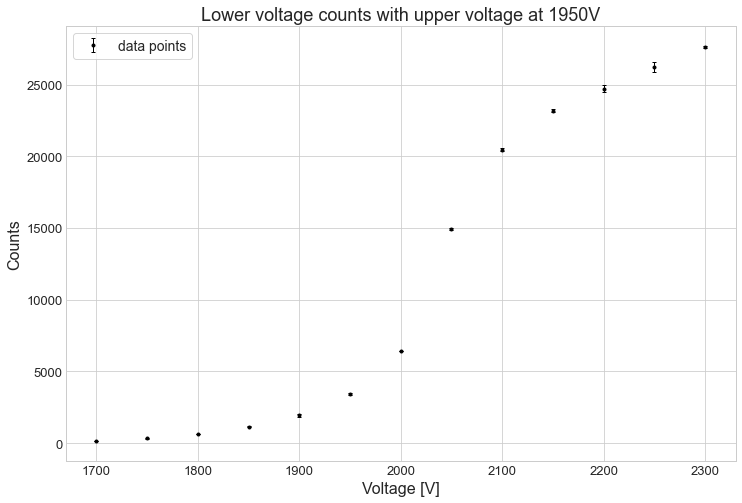

In [4]:
# working with lower voltage data
low_volt = low_data['Lower voltage [V]'].to_numpy()
lc1 = low_data['counts 1'].to_numpy()
lc2 = low_data['counts 2'].to_numpy()
lc3 = low_data['counts 3'].to_numpy()
lc4 = low_data['count 4'].to_numpy()

# define a function to calculate mean and error
def mean(a, b, c, d):
    avg = (a + b + c + d) / 4
    arr = np.array([a, b, c, d])
    err = np.std(arr, axis = 0)
    return avg, err

# saving the mean and error
cavg, cerr = mean(lc1, lc2, lc3, lc4)

# plotting 
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
plt.errorbar(low_volt, cavg, cerr, lw = 1, capsize = 2, fmt = '.k', label='data points')
plt.xlabel("Voltage [V]", fontsize = 16)
plt.ylabel("Counts", fontsize = 16)
plt.title("Lower voltage counts with upper voltage at 1950V", fontsize = 18)
plt.legend(frameon=True, fontsize = 14)
# plt.savefig('data/low_count.png')
plt.show()

In [5]:
up_data

,Upper voltage [V],coincidence 1,coincidence 2,coincidence 3,coincidence 4,coincidence avg,current [mcroA]
0,1700,115,121,113,123,118.00,1209
1,1750,171,185,191,173,180.00,1259
2,1800,231,224,242,244,235.25,1318
3,1850,276,250,250,251,256.75,1373
4,1900,302,311,321,291,306.25,1426
5,1950,371,392,378,344,371.25,1481
6,2000,354,404,381,393,383.00,1533
7,2050,379,373,404,370,381.50,1590
8,2100,403,380,369,390,385.50,1645
9,2150,418,412,410,405,411.25,1699


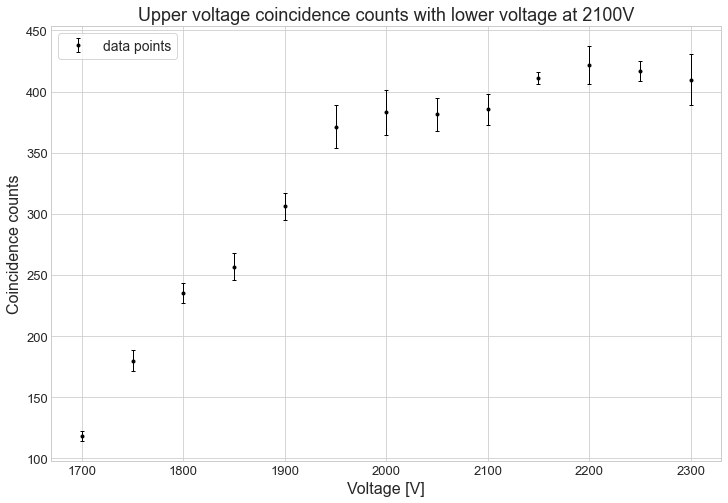

In [7]:
# working with upper voltage data 
up_volt = up_data['Upper voltage [V]'].to_numpy()
uc1 = up_data['coincidence 1'].to_numpy()
uc2 = up_data['coincidence 2'].to_numpy()
uc3 = up_data['coincidence 3'].to_numpy()
uc4 = up_data['coincidence 4'].to_numpy()

# saving the mean and error
u_cavg, u_cerr = mean(uc1, uc2, uc3, uc4)

# plotting 
plt.figure(figsize=(12,8))
plt.style.use('seaborn-whitegrid')
plt.errorbar(up_volt, u_cavg, u_cerr, lw = 1, capsize = 2, fmt = '.k', label='data points')
plt.xlabel("Voltage [V]", fontsize = 16)
plt.ylabel("Coincidence counts", fontsize = 16)
plt.title("Upper voltage coincidence counts with lower voltage at 2100V", fontsize = 18)
plt.legend(frameon=True, fontsize = 14)
# plt.savefig('data/up_count.png')
plt.show()